In [433]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare

plt.rcParams['figure.figsize'] = 24, 10
plt.style.use('dark_background')

In [434]:
# FUNCTIONS

def line(x, b):
    return b

def gauss(x, A, s, m, b=0):
    return A * (np.exp(-(x-m)**2/(2*(s**2)))) + b

def double_gauss(x,A1, A2, s1, s2, m1, m2):
    return gauss(x, A1, s1, m1) + gauss(x, A2, s2, m2)

def gen_noise(s, size=800):
    return s * np.random.randn(size)

def gen_gauss_signal(ns, A, s, m, size=800):
    noise = gen_noise(ns, size=size)
    sig      =  [gauss(x, A, s, m) for x in range(size)]
    return sig+noise, noise

def gen_double_gauss_signal(ns, A1, A2, s1, s2, m1, m2, size = 800):
    noise = gen_noise(ns, size=size)
    sig      =  [double_gauss(x, A1, A2, s1, s2, m1, m2) for x in range(size)]
    return sig+noise, noise

def grid_it():
    plt.grid(True, which='both', linestyle='-', linewidth=0.75, color='gray')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25) 
    plt.legend()

def moving_average(x_array, y_array, window):

    new_x      = []
    avr_array = []
    for i in range(window, len(y_array) - window):

        new_x.append(x_array[i])
        
        val = 0
        for j in range(1, window):
            val+= y_array[i+j]
            val+=y_array[i-j]
        val+= y_array[i]
        avr_array.append(val/(window*2 +1))
    
    return new_x, avr_array

def chi_squared(obs, exp):

    chi_arr = np.divide(( ( np.subtract(obs, exp) ) ** 2 ), exp )
    chi         = np.sum(chi_arr)
    
    return chi

def chi_sq(obs, exp):
    size = len(obs)
    chi = 0
    for i in range(size):

        val = ( (obs[i] - exp[i])**2 )
        chi+=val
        
    return chi / size

/tmp/ipykernel_95968/761061813.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


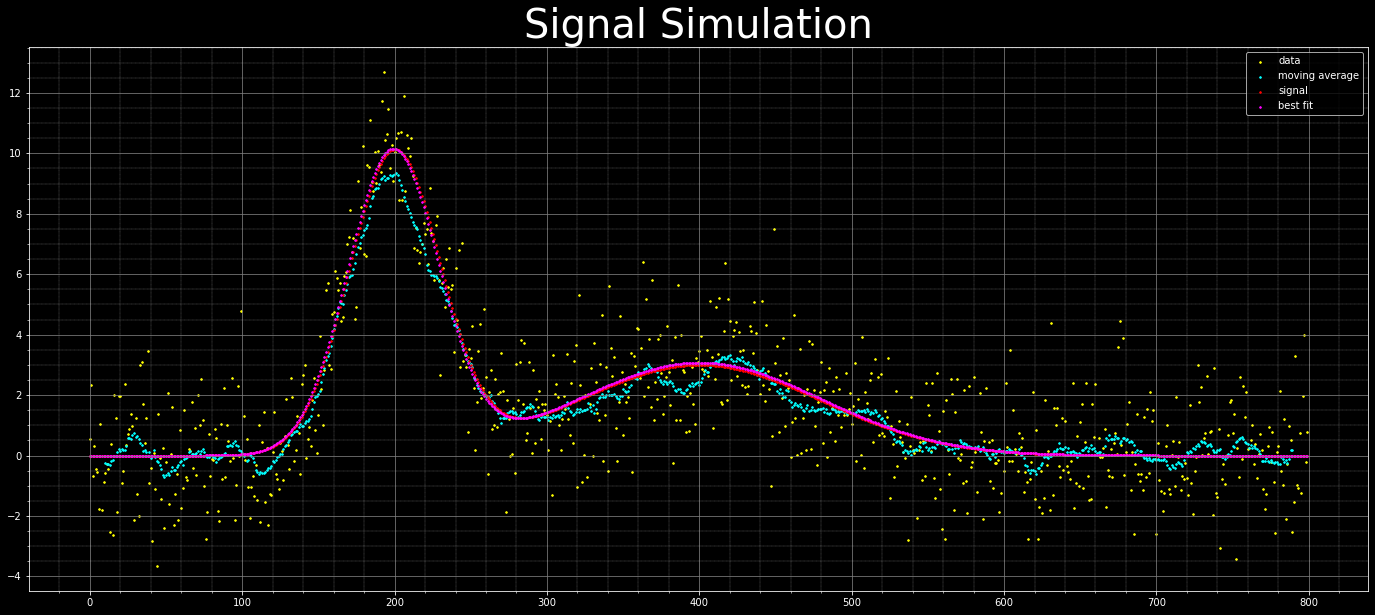

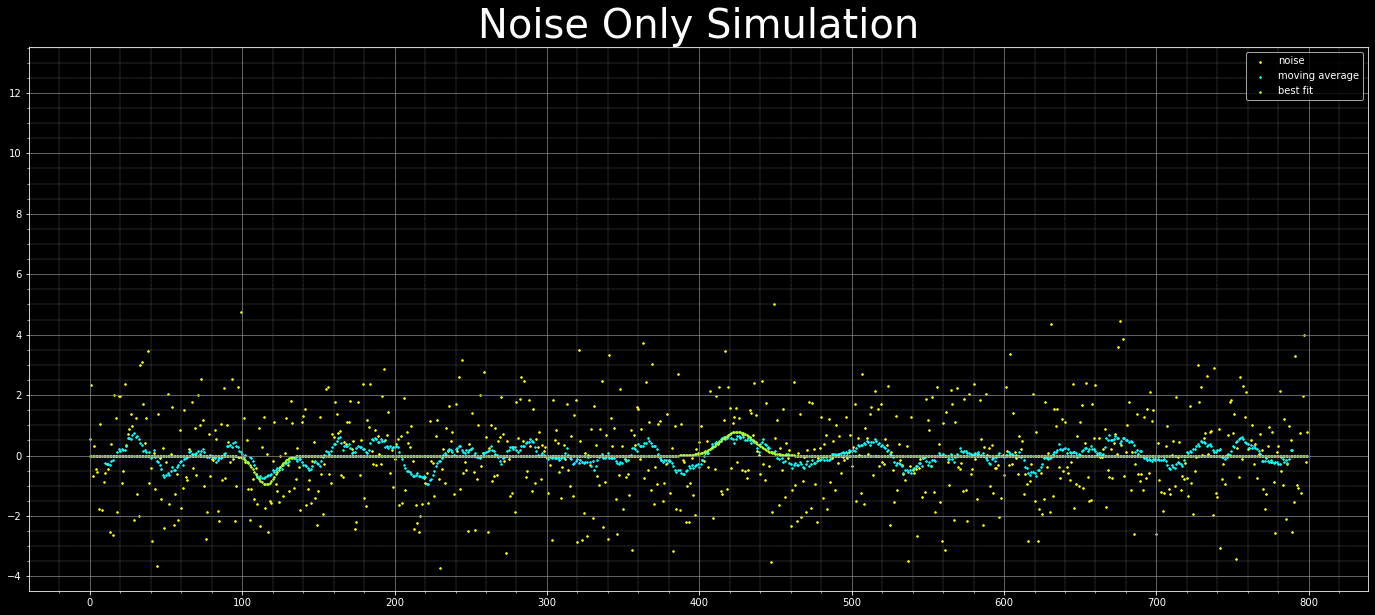

In [435]:
# GAUSSIAN PARAMETERS
A1 = 10; s1 = 30; m1 = 200
A2 = 3; s2 = 80; m2 = 400

noise_std = 1.5

window = 10

# -- SIG SIM -- #

# data
y_arr, noise = gen_double_gauss_signal(noise_std, A1,A2, s1,s2, m1,m2)
x_arr = np.arange(0, len(y_arr))
plt.scatter(x_arr, y_arr, color='yellow', s = 2, marker = 'X', label = 'data')

# moving average
x_avr, y_avr = moving_average(x_arr, y_arr, window)
plt.scatter(x_avr, y_avr, color='cyan', s = 2, marker = 'X', label = 'moving average')

# signal
y_sig     =  [double_gauss(x, A1, A2, s1, s2, m1, m2) for x in range(800)]
plt.scatter(x_arr, y_sig, color='red', s = 2, marker = 'X', label = 'signal')


# ---------
# best fit
popt, pcov = curve_fit(double_gauss, x_arr, y_arr , p0 = [1, 1, 10,10, 400,400])
fit_arr     = np.array([double_gauss(x, *popt) for x in range(800)])
plt.scatter(x_arr, fit_arr, s = 2, color = 'fuchsia', marker = 'X', label = 'best fit')

chi_sig      = chi_sq(y_arr, fit_arr)

# ----------

grid_it()
plt.title('Signal Simulation', fontsize = 40)

# Get the y-limits
y_limits = plt.gca().get_ylim()

# Extract the minimum and maximum y-values
y_min, y_max = y_limits

plt.show();

# --- NOISE --- #

# data
plt.scatter(x_arr, noise, color='yellow', s = 2, marker = 'X', label = 'noise')

# moving average
x_avr, y_avr = moving_average(x_arr, noise, window)
plt.scatter(x_avr, y_avr, color='cyan', s = 2, marker = 'X', label = 'moving average')

# best fit
popt, pcov = curve_fit(double_gauss, x_arr, noise , p0 = [5, 5, 50,50, 200,400])
fit_arr_noise     = np.array([double_gauss(x, *popt) for x in range(800)])
plt.scatter(x_arr, fit_arr_noise, s = 2, color = 'greenyellow', marker = 'X', label = 'best fit')

chisq_nosig = chi_squared(noise, fit_arr_noise)
chi_nosig     = chi_sq(noise, fit_arr_noise)

grid_it()
plt.title('Noise Only Simulation', fontsize = 40)
plt.ylim(y_min, y_max)
plt.show();

/tmp/ipykernel_95968/761061813.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


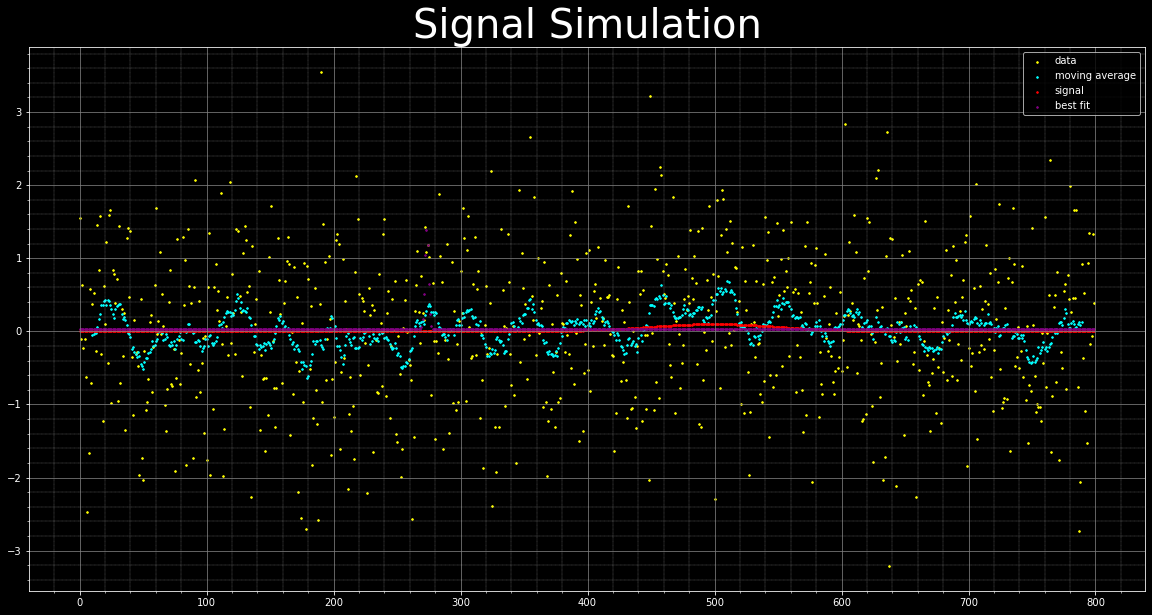

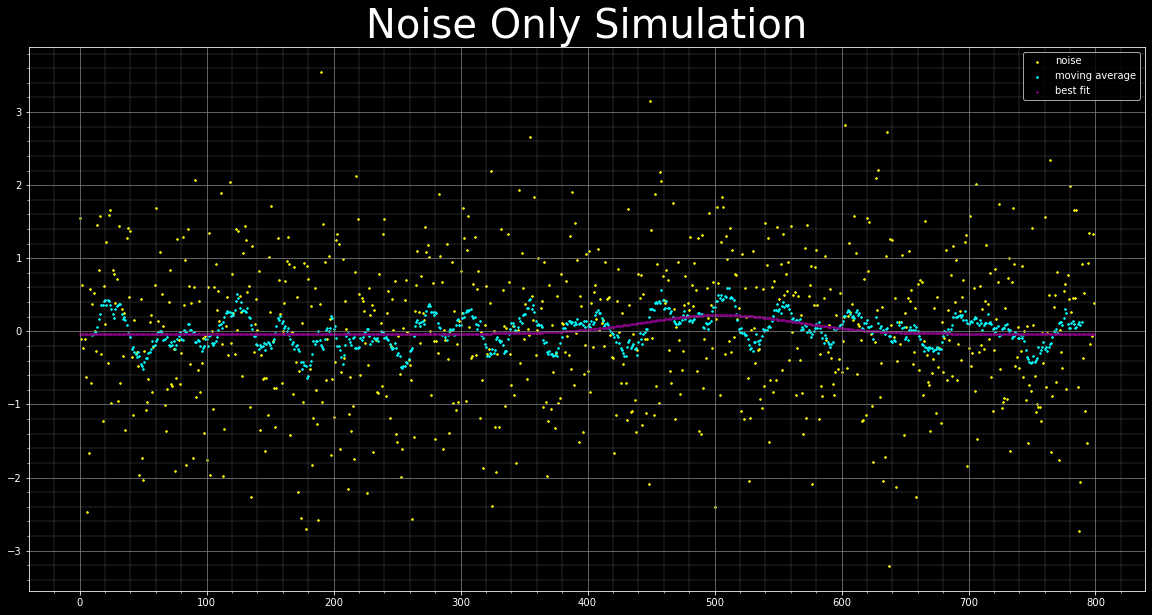

0.9896603012238171 0.9841456696434017


In [420]:
# GAUSSIAN PARAMETERS
A = 0.1; s = 50; m = 500

noise_std = 1

window = 10

# -- SIG SIM -- #

# data
y_arr, noise = gen_gauss_signal(noise_std, A,s,m)
x_arr = np.arange(0, len(y_arr))
plt.scatter(x_arr, y_arr, color='yellow', s = 2, marker = 'X', label = 'data')

# moving average
x_avr, y_avr = moving_average(x_arr, y_arr, window)
plt.scatter(x_avr, y_avr, color='cyan', s = 2, marker = 'X', label = 'moving average')

# signal
y_sig     =  [gauss(x, A,s,m) for x in range(800)]
plt.scatter(x_arr, y_sig, color='red', s = 2, marker = 'X', label = 'signal')


# ---------
# best fit
popt, pcov = curve_fit(gauss, x_arr, y_arr , p0 = [1, 50, 400, 0])
fit_arr     = np.array([gauss(x, *popt) for x in range(800)])
plt.scatter(x_arr, fit_arr, s = 2, color = 'purple', marker = 'X', label = 'best fit')

popt, pcov = curve_fit(line, x_arr, y_arr , p0 = [0])
fit_line     = np.array([line(x, *popt) for x in range(800)])
#plt.scatter(x_arr, fit_line, s = 2, color = 'purple', marker = 'X', label = 'best fit line')

chi_sig0      = chi_sq(y_arr, fit_arr)
chi_sig      = chi_sq(y_arr, fit_line)

# ----------

grid_it()
plt.title('Signal Simulation', fontsize = 40)

# Get the y-limits
y_limits = plt.gca().get_ylim()

# Extract the minimum and maximum y-values
y_min, y_max = y_limits

plt.show();

# --- NOISE --- #

# data
plt.scatter(x_arr, noise, color='yellow', s = 2, marker = 'X', label = 'noise')

# moving average
x_avr, y_avr = moving_average(x_arr, noise, window)
plt.scatter(x_avr, y_avr, color='cyan', s = 2, marker = 'X', label = 'moving average')

# best fit
popt, pcov = curve_fit(gauss, x_arr, noise , p0 = [5,50,400, 0])
fit_arr_noise     = np.array([gauss(x, *popt) for x in range(800)])
plt.scatter(x_arr, fit_arr_noise, s = 2, color = 'purple', marker = 'X', label = 'best fit')

popt, pcov = curve_fit(line, x_arr, noise , p0 = [0])
fit_line_noise     = np.array([line(x, *popt) for x in range(800)])
#plt.scatter(x_arr, fit_line_noise, s = 2, color = 'purple', marker = 'X', label = 'best fit line')

#plt.scatter(x_arr, fit_arr_noise, s = 2, color = 'greenyellow', marker = 'X', label = 'best fit')

chi_nosig0      = chi_sq(noise, fit_arr)
chi_nosig     = chi_sq(noise, fit_arr_noise)

grid_it()
plt.title('Noise Only Simulation', fontsize = 40)
plt.ylim(y_min, y_max)
plt.show();

print(chi_sig0, chi_nosig0)

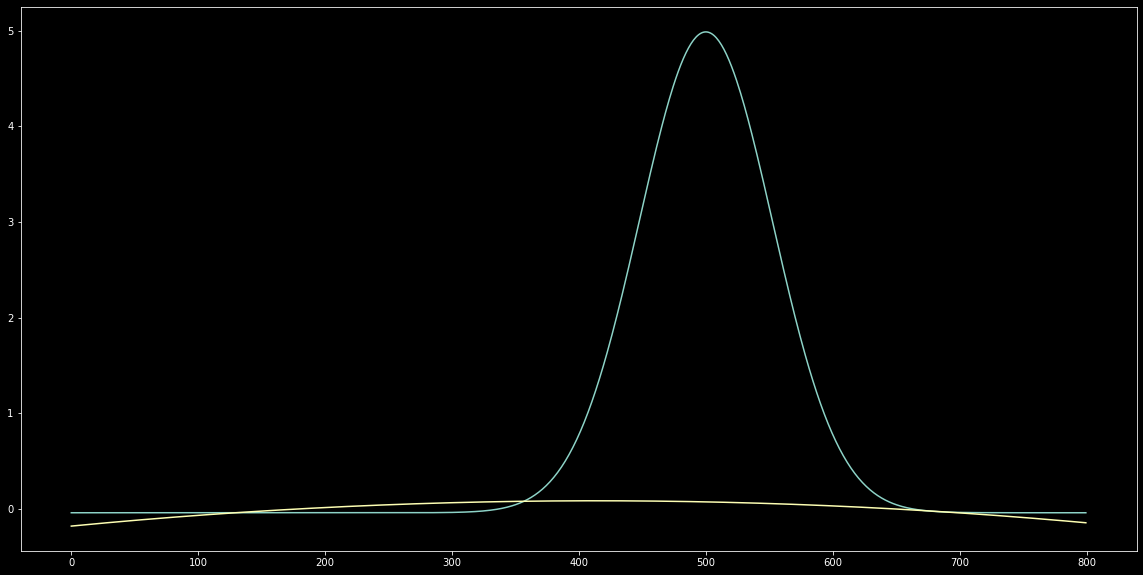

In [418]:
# GAUSSIAN PARAMETERS
A = 5; s = 50; m = 500
noise_std = 1

its = 100

chi_sig_arr      = []
chi_nosig_arr = []

for i in range(its):

    # -- SIG SIM -- #
    
    # data
    y_arr, noise = gen_gauss_signal(noise_std, A,s,m)
    x_arr = np.arange(0, len(y_arr))
    
    # ---------
    
    # best fit
    
    popt, pcov = curve_fit(gauss, x_arr, y_arr , p0 = [1,50,400,0])
    fit_line     = np.array([gauss(x, *popt) for x in range(800)])
    chi_sig      = chi_sq(y_arr, fit_line)
    chi_sig_arr.append(chi_sig)
    
    # --- NOISE --- #
    
    popt, pcov = curve_fit(gauss, x_arr, noise , p0 = [1,50,400,0])
    fit_line_noise     = np.array([gauss(x, *popt) for x in range(800)])
    
    chi_nosig     = chi_sq(noise, fit_line_noise)
    chi_nosig_arr.append(chi_nosig)

plt.plot(x_arr, fit_line)
plt.plot(x_arr, fit_line_noise)

/tmp/ipykernel_95968/761061813.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


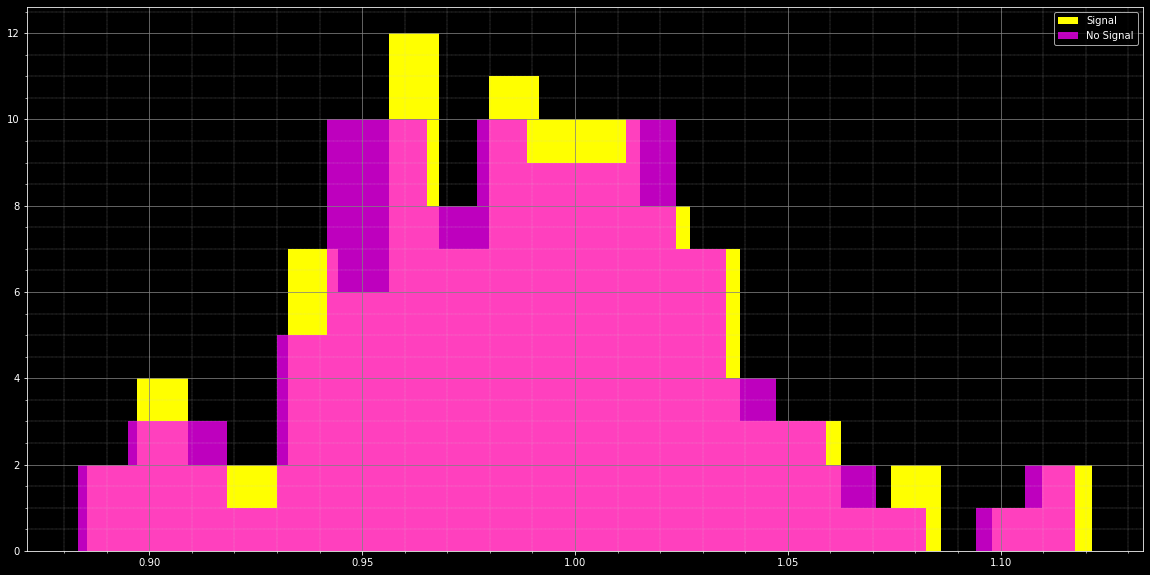

In [419]:
bins = 20
plt.hist(chi_sig_arr, bins = bins, color = 'yellow', label = 'Signal');
plt.hist(chi_nosig_arr, bins = bins, color = 'fuchsia', label = 'No Signal', alpha = 0.75);
grid_it()